In [8]:
from __future__ import division, print_function, absolute_import

from tmm import (coh_tmm, unpolarized_RT, ellips,
                       position_resolved, find_in_structure_with_inf)

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import colorpy.illuminants
    import colorpy.colormodels
    from tmm import color
    colors_were_imported = True
except ImportError:
    # without colorpy, you can't run sample5(), but everything else is fine.
    colors_were_imported = False


# "5 * degree" is 5 degrees expressed in radians
# "1.2 / degree" is 1.2 radians expressed in degrees
degree = np.pi/180

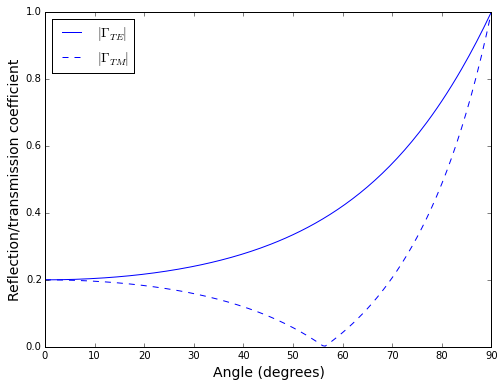

In [38]:
# list of layer thicknesses in nm
d_list = [np.inf,np.inf]
# list of refractive indices
n_list = [1,1.5]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
# initialize lists of y-values to plot
r_TE=[] 
r_TM=[]
for angle in angles_deg:
    r_TE.append(coh_tmm('s',n_list, d_list, angle*degree, wavelength)['r'])
    r_TM.append(coh_tmm('p',n_list, d_list, angle*degree, wavelength)['r'])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(angles_deg,np.abs(r_TE),'b-',label='$|\Gamma_{TE}|$')
ax.plot(angles_deg,np.abs(r_TM),'b--',label='$|\Gamma_{TM}|$')
ax.set_xlabel('Angle (degrees)',fontsize=14)
ax.set_ylabel('Reflection/transmission coefficient',fontsize=14)
ax.legend(loc=0,fontsize=14)
#ax.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), ','45$^\circ$ (purple)');

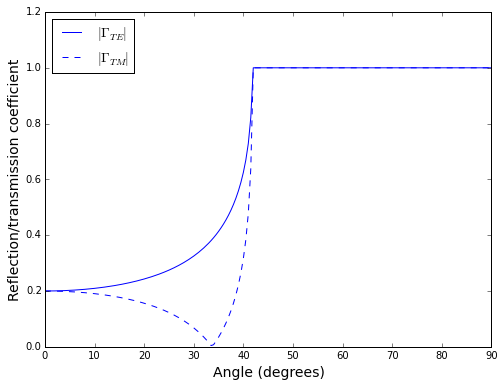

In [39]:
# list of layer thicknesses in nm
d_list = [np.inf,np.inf]
# list of refractive indices
n_list = [1.5,1.0]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
# initialize lists of y-values to plot
r_TE=[] 
r_TM=[]
for angle in angles_deg:
    r_TE.append(coh_tmm('s',n_list, d_list, angle*degree, wavelength)['r'])
    r_TM.append(coh_tmm('p',n_list, d_list, angle*degree, wavelength)['r'])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(angles_deg,np.abs(r_TE),'b-',label='$|\Gamma_{TE}|$')
ax.plot(angles_deg,np.abs(r_TM),'b--',label='$|\Gamma_{TM}|$')
ax.set_xlabel('Angle (degrees)',fontsize=14)
ax.set_ylabel('Reflection/transmission coefficient',fontsize=14)
ax.legend(loc=0,fontsize=14)
#ax.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), ','45$^\circ$ (purple)');

In [21]:
print(np.arcsin(1.0/1.5)/degree)

41.8103148958


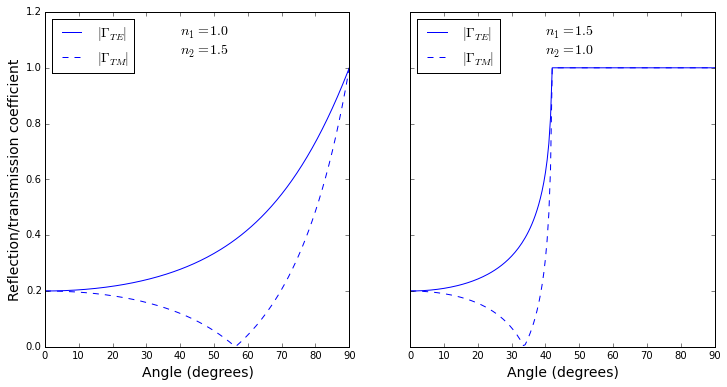

In [68]:
# list of layer thicknesses in nm
d_list = [np.inf, np.inf]
# list of refractive indices
n_list_ext = [1.0, 1.5]
n_list_int = [1.5, 1.0]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
fsize = 14

# initialize lists of y-values to plot
r_ext_TE=[] 
r_ext_TM=[]
r_int_TE=[] 
r_int_TM=[]
for angle in angles_deg:
    r_ext_TE.append(coh_tmm('s',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_ext_TM.append(coh_tmm('p',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_int_TE.append(coh_tmm('s',n_list_int, d_list, angle*degree, wavelength)['r'])
    r_int_TM.append(coh_tmm('p',n_list_int, d_list, angle*degree, wavelength)['r'])
fig, (ax_ext, ax_int) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax_ext.set_ylabel('Reflection/transmission coefficient',fontsize=fsize)
ax_ext.plot(angles_deg,np.abs(r_ext_TE),'b-',label='$|\Gamma_{TE}|$')
ax_ext.plot(angles_deg,np.abs(r_ext_TM),'b--',label='$|\Gamma_{TM}|$')
ax_ext.set_xlabel('Angle (degrees)',fontsize=fsize)
ax_ext.legend(loc=2,fontsize=14)
ax_ext.text(40,1.05,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

ax_int.plot(angles_deg,np.abs(r_int_TE),'b-',label='$|\Gamma_{TE}|$')
ax_int.plot(angles_deg,np.abs(r_int_TM),'b--',label='$|\Gamma_{TM}|$')
ax_int.set_xlabel('Angle (degrees)',fontsize=fsize)
ax_int.legend(loc=2,fontsize=fsize)
ax_int.text(40,1.05,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int[0],n_list_int[1]), fontsize=fsize)

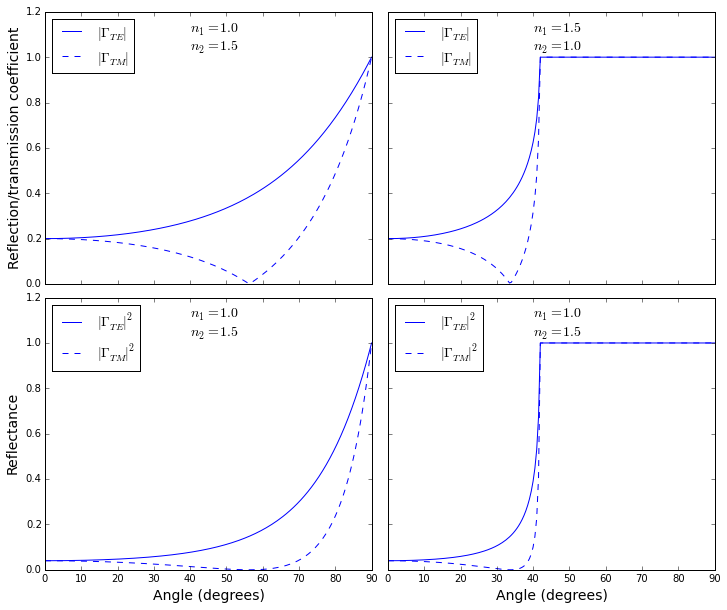

In [86]:
# list of layer thicknesses in nm
d_list = [np.inf, np.inf]
# list of refractive indices
n_list_ext = [1.0, 1.5]
n_list_int = [1.5, 1.0]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
fsize = 14

# initialize lists of y-values to plot
r_ext_TE=[] 
r_ext_TM=[]
r_int_TE=[] 
r_int_TM=[]
R_ext_TE=[]
R_ext_TM=[]
R_int_TE=[]
R_int_TM=[]
for angle in angles_deg:
    r_ext_TE.append(coh_tmm('s',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_ext_TM.append(coh_tmm('p',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_int_TE.append(coh_tmm('s',n_list_int, d_list, angle*degree, wavelength)['r'])
    r_int_TM.append(coh_tmm('p',n_list_int, d_list, angle*degree, wavelength)['r'])
    R_ext_TE.append(coh_tmm('s',n_list_ext, d_list, angle*degree, wavelength)['R'])
    R_ext_TM.append(coh_tmm('p',n_list_ext, d_list, angle*degree, wavelength)['R'])
    R_int_TE.append(coh_tmm('s',n_list_int, d_list, angle*degree, wavelength)['R'])
    R_int_TM.append(coh_tmm('p',n_list_int, d_list, angle*degree, wavelength)['R'])
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].set_ylabel('Reflection/transmission coefficient',fontsize=fsize)
ax[0][0].plot(angles_deg,np.abs(r_ext_TE),'b-',label='$|\Gamma_{TE}|$')
ax[0][0].plot(angles_deg,np.abs(r_ext_TM),'b--',label='$|\Gamma_{TM}|$')
ax[0][0].legend(loc=2,fontsize=14)
ax[0][0].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

ax[0][1].plot(angles_deg,np.abs(r_int_TE),'b-',label='$|\Gamma_{TE}|$')
ax[0][1].plot(angles_deg,np.abs(r_int_TM),'b--',label='$|\Gamma_{TM}|$')
ax[0][1].legend(loc=2,fontsize=fsize)
ax[0][1].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int[0],n_list_int[1]), fontsize=fsize)

ax[1][0].set_ylabel('Reflectance',fontsize=fsize)
ax[1][0].plot(angles_deg,np.abs(R_ext_TE),'b-',label='$|\Gamma_{TE}|^2$')
ax[1][0].plot(angles_deg,np.abs(R_ext_TM),'b--',label='$|\Gamma_{TM}|^2$')
ax[1][0].set_xlabel('Angle (degrees)',fontsize=fsize)
ax[1][0].legend(loc=2,fontsize=14)
ax[1][0].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

ax[1][1].plot(angles_deg,np.abs(R_int_TE),'b-',label='$|\Gamma_{TE}|^2$')
ax[1][1].plot(angles_deg,np.abs(R_int_TM),'b--',label='$|\Gamma_{TM}|^2$')
ax[1][1].set_xlabel('Angle (degrees)',fontsize=fsize)
ax[1][1].legend(loc=2,fontsize=14)
ax[1][1].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

fig.subplots_adjust(hspace=0.05,wspace=0.05)